In [135]:
import numpy as np
import pandas as pd

## Library visualisasi
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st #untuk melakukan uji signifikansi statistik

## NO.1

# Tunjukkan statistika deskriptif untuk variabel harga rumah 
# (Column Name : SalePrice)!
Ceritakan kepada tim bisnis apa makna dari nilai nilai 
tersebut!
Ekspektasi output :

● ukuran pemusatan (4 poin)

● ukuran penyebaran (4 poin)

● Interpretasi (2 poin)


In [136]:
# read data
df1 = pd.read_csv("train.csv")

In [137]:
#diketahui dari data
x = df1['SalePrice']

#Ukuran pemusatan 
print('Modus   :', x.mode()[0]) #frekuensi yang sering muncul pada data
print('Median  :', x.median())
print('Mean    :', x.mean())

Q3, Q1 = np.percentile(x, [75 ,25])
print('Q3 (75%):', Q3)
print('Q1 (25%):', Q1)

Modus   : 140000
Median  : 163000.0
Mean    : 180921.19589041095
Q3 (75%): 214000.0
Q1 (25%): 129975.0


Modus : Umumnya harga rumah adalah 140,000$

Mean  : Harga 1 rumah sekisaran 180,921$

Median : Nilai teangah atau 50% harga rumah berada di bawah 163,000$

Q3    : 25% harga rumah berada di batas 214,000$

Q1    : 25% harga rumah berada di bawah 129,975$

In [138]:
# Ukuran penyebaran
print('Standard Deviation         :', x.std())
print('Variance                   :', x.var())
print('Inter Quartile Range (IQR) :', Q3 - Q1)

Standard Deviation         : 79442.50288288663
Variance                   : 6311111264.297451
Inter Quartile Range (IQR) : 84025.0


Standard Deviation : Harga rumah berkisar antara 180,921 - 79,442 USD sampai 180,921 + 79,442 USD

Interquartile : Jarak antara Q3 dan Q1 sebesar 84025.0 USD

## NO. 2

# Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice) setiap tahunnya (Column Name : YrSold)!

# Secara deskriptif jelaskan apakah ada perbedaan setiap tahunnya atau tidak?

Ekspektasi output: 
    
● ukuran pemusatan (6 poin)

● ukuran penyebaran (6 poin)

● Interpretasi (3 poin)


In [139]:
# read data
df2 = pd.read_csv("train.csv")

In [140]:
def Qt1(x):
    return x.quantile(0.25)

def Qt3(x):
    return x.quantile(0.75)
    
s = df2.groupby('YrSold').agg({'SalePrice' : ['mean', 'median', Qt1, Qt3, 'std', 'var']}).reset_index()
s.columns = ['Tahun', 'Mean', 'Median', 'Q1', 'Q3', 'Std', 'Var']
data2 = s.sort_values('Mean', ascending = False)
data2

,Tahun,Mean,Median,Q1,Q3,Std,Var
1,2007,186063.151976,167000,129900,219500.0,85768.171410,7.356179e+09
0,2006,182549.458599,163995,131375,218782.5,79426.838855,6.308623e+09
3,2009,179432.103550,162000,125250,212750.0,80879.237311,6.541451e+09
4,2010,177393.674286,155000,128100,213250.0,80451.280085,6.472408e+09
2,2008,177360.838816,164000,131250,207000.0,69735.610685,4.863055e+09


Rata - rata dari harga rumah paling tinggi ada pada tahun 2007. 
Namun pada tahun tersebut memiliki harga paling beragam dibandingkan
dengan harga lainya

Note : Bila nilai Std > mean maka data akan semakin beragam, dan sebaliknya.

## NO 3

# Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk analisa apakah lebih baik menggunakan mean atau menggunakan median? Beserta alasannya (Column Name : SalePrice) 

# Ceritakan analisa tersebut dengan sudut pandang statistika. Buatlah tim bisnis paham maksud dari grafik histogram tersebut.

Ekspektasi : 
    
● Grafik Histogram (5 poin)

● Analisa (8 poin)

● Interpretasi (2 poin)


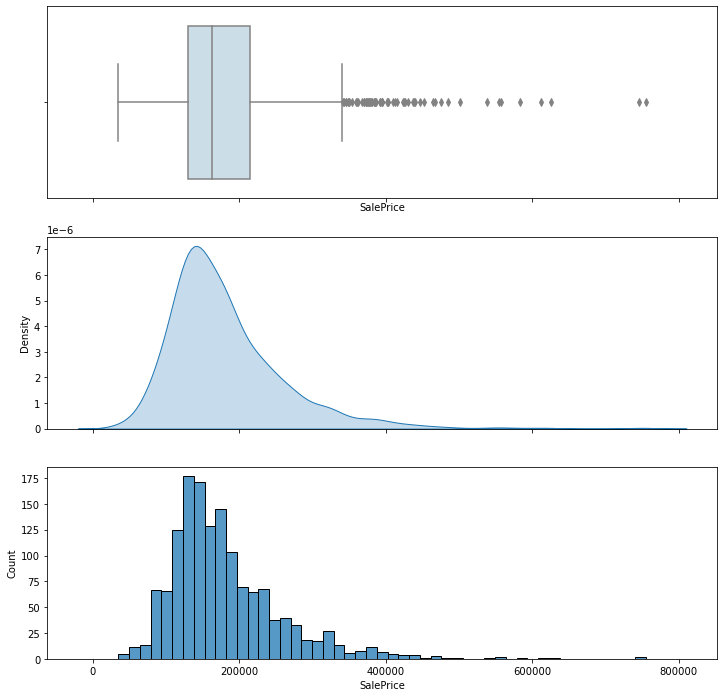

In [141]:
#read data
df3 = pd.read_csv("train.csv")

#sns.histplot(x='SalePrice', data=df3, color= 'pink')

fig, axes=plt.subplots(3,1,figsize=(12,12), sharex=True)
sns.boxplot(x='SalePrice', data=df3, palette="ch:s=.25,rot=-.25", ax=axes[0])
sns.kdeplot(data=df3, x='SalePrice', fill=True, palette='ch:s=.25,rot=-.25', ax=axes[1])
sns.histplot(data=df3, x='SalePrice', palette="ch:s=.25,rot=-.25", ax=axes[2])

plt.show()

Harga rumah memiliki sebaran yang skewed (menceng) ke arah kanan yang artinya Positively Skewed.
Hal ini menyebabkan jika kita menggunakan rata-rata akan lebih besar dibandingkan dengan menggunakan median.
Dan untuk data tersebut lebih baik kita menggunakan median 
dibandingkan dengan menggunakan rata - rata

## NO 4

# Karena ada pernyataan bahwa setiap tahunnya harga rumah itu pasti naik. (tahun terjual : YrSold, harga rumah : SalePrice) Silahkan teman-teman buktikan dengan data yang ada menggunakan ilmu statistika? (Tidak terbatas pada pengujian apapun)

Ekspektasi :

● Penentuan hipotesis (5 poin)

● Pengujian yang digunakan (5 poin)

● Hasil pengujian hipotesis (10 poin)

● Kesimpulan dan interpretasi (10 poin)


### a. Penentuan hipotesis

H0 : Rata - rata harga rumah setiap tahunya **sama**
    
H1 : Rata - rata harga rumah setiap tahunya **berbeda**

note: 

H0 = Tidak berpengaruh satu sama lainya

H1 = Mempengaruhi satu sama lainya 

### b. Pengujian yang digunakan

Melakukan pengujian **Anova**

In [142]:
# Kriteria α = 0.05

#read data
df = pd.read_csv("train.csv")

df_06 = df[df['YrSold'] == 2006]
df_07 = df[df['YrSold'] == 2007]
df_08 = df[df['YrSold'] == 2008]
df_09 = df[df['YrSold'] == 2009]
df_10 = df[df['YrSold'] == 2010]

In [143]:
df.groupby(['YrSold'])['SalePrice'].mean()

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

In [144]:
# Langkah 3

#oneway = data yang sama(data yang mirip)
#twoway = data yang beda banget(ex: membandingkan obat)
anova = st.f_oneway(df_06['SalePrice'],df_07['SalePrice'],df_08['SalePrice'],df_09['SalePrice'],df_10['SalePrice'])

In [145]:
alpha = 0.05
pvalue = anova.pvalue
print(pvalue)
if pvalue >= 0.05:
  print('Tidak cukup bukti menyatakan bahwa rata - rata harga rumah setiap tahunya sama')
else:
  print('Cukup bukti menyatakan (Tolak H0) bahwa rata - rata harga rumah setiap tahunya berbeda')


#apapbila pvalue < alpha artinya H0 yang diterima

0.6300887663573457
Tidak cukup bukti menyatakan bahwa rata - rata harga rumah setiap tahunya sama


### c. Hasil pengujian hipotesis (10 poin)

Hasil uji hipotesis menunjukkan bahwa p-value > alpha, maka kita akan mengambil keputusan bahwa tidak ada perbedaan signifikan harga rumah untuk setiap tahunya

### d. Kesimpulan dan interpretasi (10 poin)

Nilai P-Value yang didapatkan adalah 0.6300887663573457 dengan nilai alpha 0.05. Dengan hasil tersebut maka P-Value lebih besar dari alpha, maka tidak cukup bukti menyatakan bahwa rata - rata harga rumah setiap tahunya sama.

**Kersimpulan**
sehingga, kita dapat menyimpulkan rata - rata sale price house tidak mengalami kenaikan setiap tahunya

# Kasus yang akan digunakan adalah membuka akun deposit untuk nasabah bank. Pada kesempatan kali ini data scientist diminta tolong untuk menganalisa hasil ab-testing suatu perusahaan bank. Apakah jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit atau tidak?

# Data yang digunakan berasal dari folder bank.zip file yang digunakan adalah bank-full.csv

1. Untuk variabel jumlah campaign bisa dicek untuk kolom campaign 
2. untuk variabel apakah akhirnya user membuka akun atau tidak bisa menggunakan variabel y

In [146]:
#import statsmodels.stats.proportion as sp
#read data
df5 = pd.read_csv('bank-full.csv', sep=';')
df5.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**1. Pemahaman konsep A/B Testing (5 poin)** 

A. Apa nama experimentnya?

= AB Testing pengaruh jumlah campaign terhadap user yang akhirnya membuka akun deposit

B. Definisikan Hipotesis

= Nampaign akan meningkatkan user untuk membuka akun deposit

C. Siapa participant-nya?

= Nasabah Bank

D. Variabel yang akan diuji apa?

= Jumlah campaign

E. Metrics apa yang akan digunakan?

= **Macroconversions** : Jumlah campaign per nasabah

= **Microconvensions** : Jumlah nasabah yang diberi campaign

F. Berapa sample size dan durasi experiment?

In [147]:
N = df5.shape[0]
e = 0.05
slovin = N / (1+N*e**2)
slovin #menghitung jumlah sampel minimal apabila perilaku dari sebuah populasi tidak diketahui secara pasti

396.4920742803271

In [148]:
df5_Sample = df5.groupby(['y']).apply(lambda x: x.sample(n=200, random_state=123))
df5_Sample['y'].value_counts()

yes    200
no     200
Name: y, dtype: int64

Jadi jumlah sample yang dibutuhkan ada 400 sample, dengan 200 untuk masing-masing conversion group (yes/no).

durasi experiment akan dilakukan selama 7 hari

**2. Pengujian Hipotesis**

a. Pennetuan Hipotesis

Apakah jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit atau tidak?

H0 : Rata - rata jumlah campaign yang membuka akun **sama** dengan yang tidak membuka akun

H1 : Rata - rata jumlah campaign nasabah yang membuka akun **berbeda** dengan yang tidak membuka akun

b. Pengujian yang digunakan

Menggunakan uji-t untuk setiap kategori **membuka akun** dan **tidak membuka akun** 

Note : Pengujian tidak terbatas pada uji-t

c. Deteksi asumsi beserta cara penangananya

In [149]:
yes = df5[df5['y'] == 'yes']
no  = df5[df5['y'] == 'no']

In [150]:
yes['campaign'].mean()

2.1410474569861977

In [151]:
no['campaign'].mean()

2.8463503832473322

(0.0, 10.0)

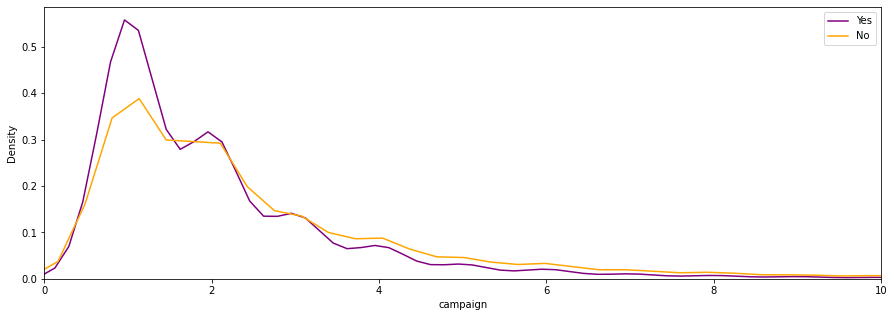

In [152]:
plt.figure(figsize=(15,5))

sns.kdeplot(yes['campaign'], label='Yes', color = 'purple')
sns.kdeplot(no['campaign'], label='No', color = 'orange')

plt.legend()
plt.xlim(0,10)

In [153]:
df5.shape

(45211, 17)

d. Hasil Pengujian Hipotesa

In [154]:
stats, pvalue = st.mannwhitneyu(yes['campaign'], no['campaign'])
pvalue

9.742452436952554e-72

In [155]:
alpha = 0.05

print('P-Value', pvalue)
if pvalue >= 0.05:
    print('Tidak cukup bukti jumlah campaign mampu membedakan user untuk membuka akun atau tidak')
else :
    print('Cukup bukti jumlah campaign mampu membedakan user untuk membuka akun atau tidak')
   
#note : p-value < alpha => Tolak H0    

P-Value 9.742452436952554e-72
Cukup bukti jumlah campaign mampu membedakan user untuk membuka akun atau tidak


e. Kesimpulam dan Interpretasi

Hasil uji hipotesi menunjukkan bahwa p-value < alpha, maka kita akan mengambil keputusan bahwa jumlah campaign berpengaruh terhadap nasabah untuk membuka akun atau tidak secara signifikan.

Namun berdasarkan mean ternyata semakin banyak campaign yang diberikan ternyata user akan semakin menolak membuka akun

jadi kesimpulanya, jumlah campaign berhubungan terbalik dengan user membuka akun